

By Bhavanandhan Line Radhakrishnan


In [136]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

Data Load:
The Given dataset is read and loaded

In [137]:
# Load dataset to spotify_data
spotify_data = pd.read_csv('C:/Users/michl/Downloads/spotify-dataset.csv')

Data Preprocessing:
The unnessesary colums are removed, null values are removed, reqired colums are transformed to Integer

In [138]:
# Data preprocessing
spotify_data.drop(['track_id', 'artists', 'album_name', 'track_name'], axis=1, inplace=True)
#Remove Null Data
spotify_data.dropna(inplace=True)
#Encoding
spotify_data['explicit'] = spotify_data['explicit'].astype(int)

spotify_data['mode'] = spotify_data['mode'].astype(int)


In [139]:
spotify_data.describe()

,Unnamed: 0,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.085500,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.279626,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.000000,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.000000,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.000000,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Encoding:
Genre column is encoded using label encoder to convert them into numerical values.

In [140]:
#Genere to Number creating new column encoded genre
encoder = LabelEncoder() 
spotify_data['encoded_genre'] = encoder.fit_transform(spotify_data['track_genre'])
spotify_data.drop(['track_genre'], axis=1, inplace=True)

Target Variable & Data Split:
Target variable is set to Y which is encoded_genre that is the numeric transformed version of Genre.
Data Split is that 20% is test and 80% is train. 

In [141]:
#target variable
X = spotify_data.drop('encoded_genre', axis=1)
y = spotify_data['encoded_genre']

# Spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)


Standard Scaliing is used to draw down all the values to a specific range.
Generating KNN, training, evauation and classification report.

In [142]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors Classifier
# Model training
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)

# Model evaluation
y_pred = knn_classifier.predict(X_test_scaled)
accuracy_KNN = accuracy_score(y_test, y_pred)
f1_score_knn = f1_score(y_test, y_pred_knn, average='weighted')
print("K-Nearest Neighbors")
print("Accuracy:", accuracy_KNN*100)
print("F1 Score:",f1_score_knn )

# Classification report
print("\nClassification Report KNN:")
print(classification_report(y_test, y_pred))




K-Nearest Neighbors
Accuracy: 37.41228070175438
F1 Score: 0.36969206837375534

Classification Report KNN:
              precision    recall  f1-score   support

           0       0.27      0.43      0.34       207
           1       0.34      0.50      0.40       185
           2       0.21      0.32      0.25       192
           3       0.26      0.24      0.25       196
           4       0.49      0.60      0.54       214
           5       0.29      0.38      0.33       194
           6       0.54      0.61      0.57       202
           7       0.43      0.57      0.49       204
           8       0.29      0.24      0.26       207
           9       0.23      0.30      0.26       208
          10       0.34      0.30      0.31       206
          11       0.18      0.15      0.16       190
          12       0.33      0.39      0.36       201
          13       0.41      0.48      0.44       210
          14       0.51      0.41      0.45       203
          15       0.26      

Generating Gaussian Naive Bayes, training, evauation and classification report.

In [143]:
# Gaussian Naive Bayes
# Model training 
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Model evaluation
y_pred = nb_classifier.predict(X_test)
accuracy_NB = accuracy_score(y_test, y_pred)
f1_score_nb = f1_score(y_test, y_pred_nb, average='weighted')
print("Gaussian Naive Bayes:")
print("Accuracy:", accuracy_NB *100)
print("F1 Score:",f1_score_nb )

# Classification report
print("\nClassification Report NB:")
print(classification_report(y_test, y_pred))

Gaussian Naive Bayes:
Accuracy: 96.25438596491229
F1 Score: 0.9625471006121494

Classification Report NB:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       207
           1       0.93      0.92      0.93       185
           2       0.95      1.00      0.97       192
           3       0.97      0.97      0.97       196
           4       0.98      0.95      0.97       214
           5       0.94      0.96      0.95       194
           6       0.97      0.97      0.97       202
           7       1.00      0.99      0.99       204
           8       0.96      0.95      0.95       207
           9       0.89      0.95      0.92       208
          10       0.96      0.92      0.94       206
          11       0.98      0.93      0.95       190
          12       0.92      0.99      0.95       201
          13       0.98      0.95      0.96       210
          14       0.96      0.98      0.97       203
          15       1.00      

Generating Logistic Regression, training, evauation and classification report.

In [144]:
# Model training - Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)

# Model evaluation
y_pred_lr = logistic_regression.predict(X_test_scaled)
accuracy_LR = accuracy_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr, average='weighted')
print("Logistic Regression")
print("Accuracy:", accuracy_LR * 100)
print("F1 Score:",f1_score_lr )

# Classification report
print("\nClassification Report LR:")
print(classification_report(y_test, y_pred_lr))

C:\Users\michl\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Accuracy: 50.48245614035088
F1 Score: 0.48866040247489423

Classification Report LR:
              precision    recall  f1-score   support

           0       0.61      0.70      0.65       207
           1       0.60      0.70      0.65       185
           2       0.24      0.28      0.26       192
           3       0.40      0.40      0.40       196
           4       0.69      0.72      0.71       214
           5       0.36      0.34      0.35       194
           6       0.74      0.84      0.79       202
           7       0.58      0.65      0.62       204
           8       0.34      0.21      0.26       207
           9       0.54      0.42      0.47       208
          10       0.65      0.61      0.63       206
          11       0.32      0.18      0.23       190
          12       0.49      0.67      0.57       201
          13       0.76      0.76      0.76       210
          14       0.58      0.63      0.61       203
          15       0.53      0

Creating a visual graph of Accuracy and F1 Score just for model comparision.

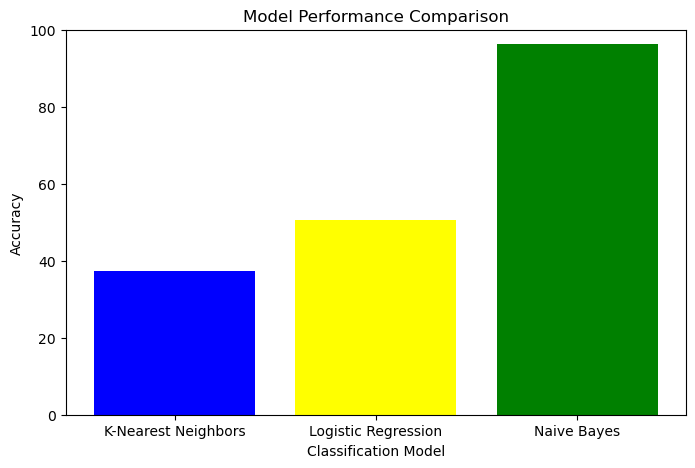

In [145]:
# Accuracy scores are multiplied by 100 just for graph scale
accuracy_knn = accuracy_KNN*100
accuracy_nb = accuracy_NB*100
accuracy_lr = accuracy_LR*100
# Create a bar plot to compare the accuracy
plt.figure(figsize=(8, 5))
models = ['K-Nearest Neighbors', 'Logistic Regression','Naive Bayes']
accuracies = [accuracy_knn, accuracy_lr, accuracy_nb]
plt.bar(models, accuracies, color=['blue','yellow', 'green'])
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0, 100)
plt.show()


F1 Scores:
F1 Score K-Nearest Neighbors: 0.36969206837375534
F1 Score Linear Regression: 0.48866040247489423
F1 Score Naive Bayes: 0.9625471006121494


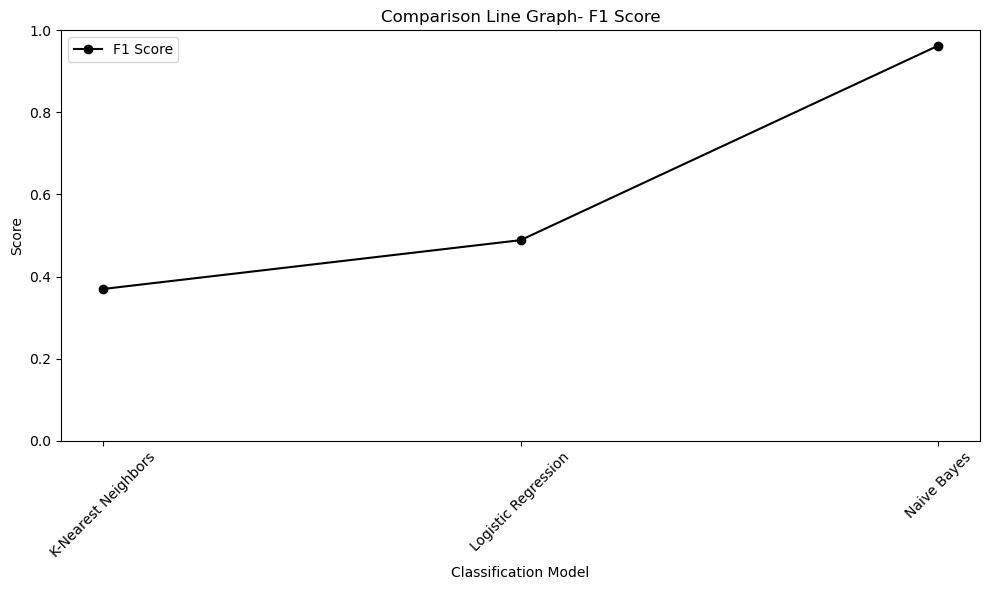

In [146]:
# F1 scores
print("F1 Scores:")
print("F1 Score K-Nearest Neighbors:",f1_score_knn)
print("F1 Score Linear Regression:",f1_score_lr )
print("F1 Score Naive Bayes:",f1_score_nb )


f1_scores = {
    'K-Nearest Neighbors': f1_score_knn,'Logistic Regression': f1_score_lr,'Naive Bayes': f1_score_nb
}
#F1 scores line graph
plt.figure(figsize=(10, 6))
plt.plot(list(f1_scores.keys()), list(f1_scores.values()), marker='o', linestyle='-', color='black', label='F1 Score')
plt.xlabel('Classification Model')
plt.ylabel('Score')
plt.title('Comparison Line Graph- F1 Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

Evaluation Metrics Used:

To evaluate the performance of the genre classification model, the below metrics are used:

Accuracy: The proportion of correctly classified music tracks among the dataset.

F1 Score: F1 score is claculated using the value of presition and recall.

Precision: Precision focuses on the accuracy of positive predictions.

Analysis:
Naive Bayes performed the best among the three models in testing accuracy, F1 score and precision. It achieved the highest testing accuracy of 96.28%, indicating its effectiveness in classifying the given dataset.
Logistic Regression has  achieved accurasy of around 50.5%.
In comparision to these K-Nearest Neigbour which has accuracy of 37.1%.
A visual representation of Accuracy and F1 score comparision is shown above.

Recommendation:
The Naive Bayes model stands out for classification tasks with similar datasets due to its superior performance. Its high accuracy and precision make it particularly well-suited for scenarios where the accuracy of categorization is important. Meanwhile, the Logistic Regression model demonstrated an average performance.
Whereas low performance was seen in K-Nearest Neighbors which is not ideal for this dataset and genre classification.

Conclution:
Through this we could state that these models may assist organizations in making data driven decisions, such as identifying target categories,  user behavior, or analyse such impactful factors.